In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import logging 

logging.basicConfig(
  format = '%(asctime)s %(message)s',
  level=logging.INFO,
  datefmt='%Y-%m-%d %H:%M:%S'
)

In [3]:
import pandas as pd

CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
promoters_filename = f'{CONSTRAINT_TOOLS}/download-process-data/promoters/promoters.grch38.csv'
promoters = pd.read_csv(promoters_filename, sep=',')
promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped
0,ENST00000423902,ENSG00000171316,CHD7,1.093179,0.066,0.028673,0.384675,0.911891,chr8:60676779-60680777,3999,chr8:60678279-60679277
1,ENST00000262238,ENSG00000100811,YY1,1.047433,0.194,0.000000,0.391550,0.938165,chr14:100236986-100240984,3999,chr14:100238486-100239484
2,ENST00000361752,ENSG00000112531,QKI,1.025761,0.435,0.168260,0.184000,0.985674,chr6:163412644-163416642,3999,chr6:163414144-163415142
3,ENST00000376663,ENSG00000168283,BMI1,1.006077,0.359,0.114010,0.494700,0.978582,chr10:22319212-22323210,3999,chr10:22320712-22321710
4,ENST00000375856,ENSG00000185950,IRS2,1.005353,0.297,0.114820,0.327800,0.916849,chr13:109784570-109788568,3999,chr13:109786070-109787068
...,...,...,...,...,...,...,...,...,...,...,...
11049,ENST00000458043,ENSG00000165899,OTOGL,0.086759,0.877,0.736330,0.093875,0.842823,chr12:80207454-80211452,3999,chr12:80208954-80209952
11050,ENST00000356972,ENSG00000196800,SPINK14,0.086755,1.372,0.539280,0.025025,0.577764,chr5:148167734-148171732,3999,chr5:148169234-148170232
11051,ENST00000336374,ENSG00000160870,CYP3A7,0.084793,1.286,0.900330,0.015400,0.491317,chr7:99733098-99737096,3999,chr7:99734598-99735596
11052,ENST00000261172,ENSG00000083782,EPYC,0.081777,1.314,0.794420,0.156150,0.837059,chr12:91003028-91007026,3999,chr12:91004528-91005526


In [4]:
import sys
sys.path.append('/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools/utilities')

from pack_unpack import unpack
import pyranges as pr

def add_chromosome_start_end(row): 
    region = row['region_grch38_clipped'] 
    row['Chromosome'], row['Start'], row['End'] = unpack(region)
    return row

promoters = promoters.apply(add_chromosome_start_end, axis=1)
promoters = pr.PyRanges(promoters)
promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End
0,ENST00000283179,ENSG00000153187,HNRNPU,0.965798,0.118,0.024905,0.343500,0.968901,chr1:244862473-244866471,3999,chr1:244863973-244864971,chr1,244863973,244864971
1,ENST00000366609,ENSG00000168264,IRF2BP2,0.937473,0.448,0.094388,0.424900,0.820238,chr1:234607527-234611525,3999,chr1:234609027-234610025,chr1,234609027,234610025
2,ENST00000366813,ENSG00000163041,H3F3A,0.902507,1.157,0.369730,0.364550,0.977616,chr1:226061978-226065976,3999,chr1:226063478-226064476,chr1,226063478,226064476
3,ENST00000270722,ENSG00000142611,PRDM16,0.897460,0.185,0.080679,0.314425,0.911041,chr1:3067212-3071210,3999,chr1:3068712-3069710,chr1,3068712,3069710
4,ENST00000370445,ENSG00000143032,BARHL2,0.896027,0.547,0.173920,0.471100,0.931959,chr1:90715239-90719237,3999,chr1:90716739-90717737,chr1,90716739,90717737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,ENST00000215812,ENSG00000100012,SEC14L3,0.146733,1.639,1.217400,0.099950,0.878042,chr22:30470051-30474049,3999,chr22:30471551-30472549,chr22,30471551,30472549
11050,ENST00000404699,ENSG00000175329,ISX,0.122206,1.700,0.953980,0.046275,0.530358,chr22:35064137-35068135,3999,chr22:35065637-35066635,chr22,35065637,35066635
11051,ENST00000331428,ENSG00000172967,XKR3,0.121645,0.945,0.365810,0.281825,0.653140,chr22:16819701-16823699,3999,chr22:16821201-16822199,chr22,16821201,16822199
11052,ENST00000248935,ENSG00000184674,GSTT1,0.327044,1.370,0.732030,0.038850,0.480259,chr22_KI270879v1_alt:276461-280459,3999,chr22_KI270879v1_alt:277961-278959,chr22_KI270879v1_alt,277961,278959


In [5]:
from read_model import read_model 

model = read_model('/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools/dist/model-germline-grch38.json')

# https://biocore-ntnu.github.io/pyranges/loadingcreating-pyranges.html
neutral_regions = pr.read_bed(model['neutralRegions'])

neutral_regions

,Chromosome,Start,End
0,chr1,14653,14905
1,chr1,15354,15772
2,chr1,16125,16607
3,chr1,17055,17171
4,chr1,17436,17606
...,...,...,...
1649454,chr22,50794754,50796286
1649455,chr22,50796386,50796692
1649456,chr22,50796780,50796942
1649457,chr22,50797586,50797812


In [6]:
promoters.promoter_id = promoters.df.index.values

promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End,promoter_id
0,ENST00000283179,ENSG00000153187,HNRNPU,0.965798,0.118,0.024905,0.343500,0.968901,chr1:244862473-244866471,3999,chr1:244863973-244864971,chr1,244863973,244864971,0
1,ENST00000366609,ENSG00000168264,IRF2BP2,0.937473,0.448,0.094388,0.424900,0.820238,chr1:234607527-234611525,3999,chr1:234609027-234610025,chr1,234609027,234610025,1
2,ENST00000366813,ENSG00000163041,H3F3A,0.902507,1.157,0.369730,0.364550,0.977616,chr1:226061978-226065976,3999,chr1:226063478-226064476,chr1,226063478,226064476,2
3,ENST00000270722,ENSG00000142611,PRDM16,0.897460,0.185,0.080679,0.314425,0.911041,chr1:3067212-3071210,3999,chr1:3068712-3069710,chr1,3068712,3069710,3
4,ENST00000370445,ENSG00000143032,BARHL2,0.896027,0.547,0.173920,0.471100,0.931959,chr1:90715239-90719237,3999,chr1:90716739-90717737,chr1,90716739,90717737,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,ENST00000215812,ENSG00000100012,SEC14L3,0.146733,1.639,1.217400,0.099950,0.878042,chr22:30470051-30474049,3999,chr22:30471551-30472549,chr22,30471551,30472549,11049
11050,ENST00000404699,ENSG00000175329,ISX,0.122206,1.700,0.953980,0.046275,0.530358,chr22:35064137-35068135,3999,chr22:35065637-35066635,chr22,35065637,35066635,11050
11051,ENST00000331428,ENSG00000172967,XKR3,0.121645,0.945,0.365810,0.281825,0.653140,chr22:16819701-16823699,3999,chr22:16821201-16822199,chr22,16821201,16822199,11051
11052,ENST00000248935,ENSG00000184674,GSTT1,0.327044,1.370,0.732030,0.038850,0.480259,chr22_KI270879v1_alt:276461-280459,3999,chr22_KI270879v1_alt:277961-278959,chr22_KI270879v1_alt,277961,278959,11052


In [7]:
# https://pyranges.readthedocs.io/en/latest/autoapi/pyranges/pyranges/index.html?highlight=intersect#pyranges.pyranges.PyRanges.overlap

promoters_that_overlap_neutral_regions = promoters.overlap(neutral_regions).df
promoters_that_overlap_neutral_regions

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End,promoter_id
0,ENST00000283179,ENSG00000153187,HNRNPU,0.965798,0.118,0.024905,0.343500,0.968901,chr1:244862473-244866471,3999,chr1:244863973-244864971,chr1,244863973,244864971,0
1,ENST00000366813,ENSG00000163041,H3F3A,0.902507,1.157,0.369730,0.364550,0.977616,chr1:226061978-226065976,3999,chr1:226063478-226064476,chr1,226063478,226064476,2
2,ENST00000270722,ENSG00000142611,PRDM16,0.897460,0.185,0.080679,0.314425,0.911041,chr1:3067212-3071210,3999,chr1:3068712-3069710,chr1,3068712,3069710,3
3,ENST00000370445,ENSG00000143032,BARHL2,0.896027,0.547,0.173920,0.471100,0.931959,chr1:90715239-90719237,3999,chr1:90716739-90717737,chr1,90716739,90717737,4
4,ENST00000312239,ENSG00000127483,HP1BP3,0.893127,0.306,0.118370,0.133375,0.890274,chr1:20784690-20788688,3999,chr1:20786190-20787188,chr1,20786190,20787188,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,ENST00000266088,ENSG00000100170,SLC5A1,0.177320,0.746,0.497440,0.091225,0.830670,chr22:32041033-32045031,3999,chr22:32042533-32043531,chr22,32042533,32043531,11047
10389,ENST00000215885,ENSG00000100078,PLA2G3,0.160310,1.186,0.808050,0.137300,0.543476,chr22:31138609-31142607,3999,chr22:31140109-31141107,chr22,31140109,31141107,11048
10390,ENST00000215812,ENSG00000100012,SEC14L3,0.146733,1.639,1.217400,0.099950,0.878042,chr22:30470051-30474049,3999,chr22:30471551-30472549,chr22,30471551,30472549,11049
10391,ENST00000404699,ENSG00000175329,ISX,0.122206,1.700,0.953980,0.046275,0.530358,chr22:35064137-35068135,3999,chr22:35065637-35066635,chr22,35065637,35066635,11050


In [8]:
# https://pyranges.readthedocs.io/en/latest/autoapi/pyranges/pyranges/index.html?highlight=intersect#pyranges.pyranges.PyRanges.intersect

neutral_regions_within_promoters = promoters.intersect(neutral_regions).df[['Start', 'End', 'promoter_id']]
neutral_regions_within_promoters


,Start,End,promoter_id
0,244864560,244864738,0
1,226063681,226063880,2
2,3068712,3068866,3
3,3069296,3069710,3
4,90717302,90717737,4
...,...,...,...
19916,30471551,30471905,11049
19917,30472017,30472549,11049
19918,35065637,35066136,11050
19919,16821201,16821525,11051


In [9]:
promoters_with_neutral_regions = pd.merge(
  promoters_that_overlap_neutral_regions, 
  neutral_regions_within_promoters,
  on='promoter_id', 
  how='inner'
)
promoters_with_neutral_regions = promoters_with_neutral_regions.rename(columns={
  "Start_x": "Start_promoter", 
  "End_x": "End_promoter",
  "Start_y": "Start_neutral_part", 
  "End_y": "End_neutral_part",
})
promoters_with_neutral_regions


,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start_promoter,End_promoter,promoter_id,Start_neutral_part,End_neutral_part
0,ENST00000283179,ENSG00000153187,HNRNPU,0.965798,0.118,0.024905,0.343500,0.968901,chr1:244862473-244866471,3999,chr1:244863973-244864971,chr1,244863973,244864971,0,244864560,244864738
1,ENST00000366813,ENSG00000163041,H3F3A,0.902507,1.157,0.369730,0.364550,0.977616,chr1:226061978-226065976,3999,chr1:226063478-226064476,chr1,226063478,226064476,2,226063681,226063880
2,ENST00000270722,ENSG00000142611,PRDM16,0.897460,0.185,0.080679,0.314425,0.911041,chr1:3067212-3071210,3999,chr1:3068712-3069710,chr1,3068712,3069710,3,3068712,3068866
3,ENST00000270722,ENSG00000142611,PRDM16,0.897460,0.185,0.080679,0.314425,0.911041,chr1:3067212-3071210,3999,chr1:3068712-3069710,chr1,3068712,3069710,3,3069296,3069710
4,ENST00000370445,ENSG00000143032,BARHL2,0.896027,0.547,0.173920,0.471100,0.931959,chr1:90715239-90719237,3999,chr1:90716739-90717737,chr1,90716739,90717737,4,90717302,90717737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,ENST00000215812,ENSG00000100012,SEC14L3,0.146733,1.639,1.217400,0.099950,0.878042,chr22:30470051-30474049,3999,chr22:30471551-30472549,chr22,30471551,30472549,11049,30471551,30471905
19917,ENST00000215812,ENSG00000100012,SEC14L3,0.146733,1.639,1.217400,0.099950,0.878042,chr22:30470051-30474049,3999,chr22:30471551-30472549,chr22,30471551,30472549,11049,30472017,30472549
19918,ENST00000404699,ENSG00000175329,ISX,0.122206,1.700,0.953980,0.046275,0.530358,chr22:35064137-35068135,3999,chr22:35065637-35066635,chr22,35065637,35066635,11050,35065637,35066136
19919,ENST00000331428,ENSG00000172967,XKR3,0.121645,0.945,0.365810,0.281825,0.653140,chr22:16819701-16823699,3999,chr22:16821201-16822199,chr22,16821201,16822199,11051,16821201,16821525


In [10]:
def compute_neutral_part_length(row):
    return row['End_neutral_part'] - row['Start_neutral_part']

promoters_with_neutral_regions['neutral_part_length'] = promoters_with_neutral_regions.apply(compute_neutral_part_length, axis=1)
promoters_with_neutral_regions

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start_promoter,End_promoter,promoter_id,Start_neutral_part,End_neutral_part,neutral_part_length
0,ENST00000283179,ENSG00000153187,HNRNPU,0.965798,0.118,0.024905,0.343500,0.968901,chr1:244862473-244866471,3999,chr1:244863973-244864971,chr1,244863973,244864971,0,244864560,244864738,178
1,ENST00000366813,ENSG00000163041,H3F3A,0.902507,1.157,0.369730,0.364550,0.977616,chr1:226061978-226065976,3999,chr1:226063478-226064476,chr1,226063478,226064476,2,226063681,226063880,199
2,ENST00000270722,ENSG00000142611,PRDM16,0.897460,0.185,0.080679,0.314425,0.911041,chr1:3067212-3071210,3999,chr1:3068712-3069710,chr1,3068712,3069710,3,3068712,3068866,154
3,ENST00000270722,ENSG00000142611,PRDM16,0.897460,0.185,0.080679,0.314425,0.911041,chr1:3067212-3071210,3999,chr1:3068712-3069710,chr1,3068712,3069710,3,3069296,3069710,414
4,ENST00000370445,ENSG00000143032,BARHL2,0.896027,0.547,0.173920,0.471100,0.931959,chr1:90715239-90719237,3999,chr1:90716739-90717737,chr1,90716739,90717737,4,90717302,90717737,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,ENST00000215812,ENSG00000100012,SEC14L3,0.146733,1.639,1.217400,0.099950,0.878042,chr22:30470051-30474049,3999,chr22:30471551-30472549,chr22,30471551,30472549,11049,30471551,30471905,354
19917,ENST00000215812,ENSG00000100012,SEC14L3,0.146733,1.639,1.217400,0.099950,0.878042,chr22:30470051-30474049,3999,chr22:30471551-30472549,chr22,30471551,30472549,11049,30472017,30472549,532
19918,ENST00000404699,ENSG00000175329,ISX,0.122206,1.700,0.953980,0.046275,0.530358,chr22:35064137-35068135,3999,chr22:35065637-35066635,chr22,35065637,35066635,11050,35065637,35066136,499
19919,ENST00000331428,ENSG00000172967,XKR3,0.121645,0.945,0.365810,0.281825,0.653140,chr22:16819701-16823699,3999,chr22:16821201-16822199,chr22,16821201,16822199,11051,16821201,16821525,324


In [11]:
promoters_with_neutral_regions = promoters_with_neutral_regions[['promoter_id', 'neutral_part_length']]
promoters_with_neutral_regions 


,promoter_id,neutral_part_length
0,0,178
1,2,199
2,3,154
3,3,414
4,4,435
...,...,...
19916,11049,354
19917,11049,532
19918,11050,499
19919,11051,324


In [12]:
grouped_neutral_regions = promoters_with_neutral_regions.groupby('promoter_id')

number_neutral_bases = grouped_neutral_regions['neutral_part_length'].sum().rename("number_neutral_bases")
number_neutral_bases

promoter_id
0        178
2        199
3        568
4        435
5        522
        ... 
11047    843
11048    599
11049    886
11050    499
11051    824
Name: number_neutral_bases, Length: 10393, dtype: int64

In [13]:
number_neutral_parts = grouped_neutral_regions['neutral_part_length'].count().rename('number_neutral_parts')
number_neutral_parts

promoter_id
0        1
2        1
3        2
4        1
5        1
        ..
11047    2
11048    1
11049    2
11050    1
11051    2
Name: number_neutral_parts, Length: 10393, dtype: int64

In [14]:
promoters = ( 
  promoters.df
  .merge(number_neutral_bases, on='promoter_id', how='inner')
  .merge(number_neutral_parts, on='promoter_id', how='inner')
)

promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End,promoter_id,number_neutral_bases,number_neutral_parts
0,ENST00000283179,ENSG00000153187,HNRNPU,0.965798,0.118,0.024905,0.343500,0.968901,chr1:244862473-244866471,3999,chr1:244863973-244864971,chr1,244863973,244864971,0,178,1
1,ENST00000366813,ENSG00000163041,H3F3A,0.902507,1.157,0.369730,0.364550,0.977616,chr1:226061978-226065976,3999,chr1:226063478-226064476,chr1,226063478,226064476,2,199,1
2,ENST00000270722,ENSG00000142611,PRDM16,0.897460,0.185,0.080679,0.314425,0.911041,chr1:3067212-3071210,3999,chr1:3068712-3069710,chr1,3068712,3069710,3,568,2
3,ENST00000370445,ENSG00000143032,BARHL2,0.896027,0.547,0.173920,0.471100,0.931959,chr1:90715239-90719237,3999,chr1:90716739-90717737,chr1,90716739,90717737,4,435,1
4,ENST00000312239,ENSG00000127483,HP1BP3,0.893127,0.306,0.118370,0.133375,0.890274,chr1:20784690-20788688,3999,chr1:20786190-20787188,chr1,20786190,20787188,5,522,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,ENST00000266088,ENSG00000100170,SLC5A1,0.177320,0.746,0.497440,0.091225,0.830670,chr22:32041033-32045031,3999,chr22:32042533-32043531,chr22,32042533,32043531,11047,843,2
10389,ENST00000215885,ENSG00000100078,PLA2G3,0.160310,1.186,0.808050,0.137300,0.543476,chr22:31138609-31142607,3999,chr22:31140109-31141107,chr22,31140109,31141107,11048,599,1
10390,ENST00000215812,ENSG00000100012,SEC14L3,0.146733,1.639,1.217400,0.099950,0.878042,chr22:30470051-30474049,3999,chr22:30471551-30472549,chr22,30471551,30472549,11049,886,2
10391,ENST00000404699,ENSG00000175329,ISX,0.122206,1.700,0.953980,0.046275,0.530358,chr22:35064137-35068135,3999,chr22:35065637-35066635,chr22,35065637,35066635,11050,499,1


<AxesSubplot:>

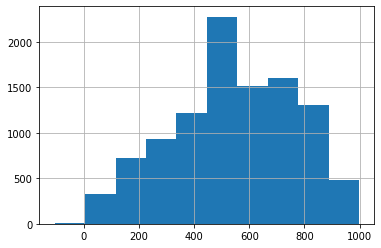

In [15]:
promoters['number_neutral_bases'].hist() 

In [16]:
# https://papermill.readthedocs.io/en/latest/usage-parameterize.html
number_neutral_bases_lower = None
number_neutral_bases_upper = None

In [17]:
# Parameters
number_neutral_bases_lower = 300
number_neutral_bases_upper = 400


In [18]:
# https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html#how-do-i-filter-specific-rows-from-a-dataframe
promoters = promoters[
    (promoters['number_neutral_bases'] > number_neutral_bases_lower) & 
    (promoters['number_neutral_bases'] < number_neutral_bases_upper) & 
    (promoters['number_neutral_parts'] < 5)
]
promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End,promoter_id,number_neutral_bases,number_neutral_parts
11,ENST00000373012,ENSG00000185668,POU3F1,0.845322,0.707,0.149050,0.477425,0.812906,chr1:38044780-38048778,3999,chr1:38046280-38047278,chr1,38046280,38047278,13,341,1
19,ENST00000321358,ENSG00000065978,YBX1,0.817983,0.366,0.116130,0.255125,0.960064,chr1:42680428-42684426,3999,chr1:42681928-42682926,chr1,42681928,42682926,22,392,2
26,ENST00000377658,ENSG00000162413,KLHL21,0.802920,1.001,0.590360,0.313350,0.854125,chr1:6600871-6604869,3999,chr1:6602371-6603369,chr1,6602371,6603369,30,368,1
35,ENST00000343537,ENSG00000143514,TP53BP2,0.787800,0.411,0.267100,0.044925,0.796026,chr1:223843974-223847972,3999,chr1:223845474-223846472,chr1,223845474,223846472,40,307,2
40,ENST00000371320,ENSG00000157216,SSBP3,0.779556,0.150,0.031576,0.487875,0.959640,chr1:54404421-54408419,3999,chr1:54405921-54406919,chr1,54405921,54406919,45,393,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,ENST00000248933,ENSG00000100095,SEZ6L,0.483708,0.377,0.222260,0.188300,0.823676,chr22:26167576-26171574,3999,chr22:26169076-26170074,chr22,26169076,26170074,10975,311,1
10331,ENST00000484558,ENSG00000250479,CHCHD10,0.461197,1.876,1.194300,0.068500,0.888224,chr22:23766445-23770443,3999,chr22:23767945-23768943,chr22,23767945,23768943,10985,320,2
10338,ENST00000397781,ENSG00000100319,ZMAT5,0.450807,1.232,0.706120,0.080450,0.756472,chr22:29764982-29768980,3999,chr22:29766482-29767480,chr22,29766482,29767480,10992,390,1
10367,ENST00000216117,ENSG00000100292,HMOX1,0.351129,0.977,0.464850,0.031300,0.483773,chr22:35378836-35382834,3999,chr22:35380336-35381334,chr22,35380336,35381334,11024,346,2


In [19]:
#papermill_description=COMPUTE_ZSCORES

import numpy as np 

sys.path.append('/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools/predict-constraint/germline-model')
from expected_observed_counts import compute_expected_observed_counts
from pack_unpack import pack

window_stride = 10 

def filter_and_average(xs): 
    if not xs: return None 
    elif len(xs) == 0: return None
    else: return np.mean([x for x in xs if x])

def compute_neutral_zscores(row): 
    region = pack(row['Chromosome'], row['Start'], row['End'])  
    expected_observed_counts = compute_expected_observed_counts(region, model, window_stride, log=False) 
    # https://www.dataquest.io/blog/settingwithcopywarning/
    with pd.option_context('mode.chained_assignment', None):
        row['N_bar_mean_neutral'] = filter_and_average(expected_observed_counts['NBarsNeutralRegions'])
        row['N_observeds_mean_neutral'] = filter_and_average(expected_observed_counts['NObservedsNeutralRegions'])
        row['K_bar_mean_neutral'] = filter_and_average(expected_observed_counts['KBarsNeutralRegions'])
        row['K_observeds_mean_neutral'] = filter_and_average(expected_observed_counts['KObservedsNeutralRegions'])
    return row 

# https://stackoverflow.com/a/34365537/6674256
from tqdm.auto import tqdm  # for notebooks
tqdm.pandas()
logging.info('Computing z-scores for promoters...')
promoters_with_zscores = promoters.progress_apply(compute_neutral_zscores, axis=1)
logging.info('...finished computing z-scores for promoters...')

promoters_with_zscores.head()

2022-06-09 12:24:23 Computing z-scores for promoters...


  0%|          | 0/985 [00:00<?, ?it/s]

2022-06-09 13:24:04 ...finished computing z-scores for promoters...


,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,...,Chromosome,Start,End,promoter_id,number_neutral_bases,number_neutral_parts,N_bar_mean_neutral,N_observeds_mean_neutral,K_bar_mean_neutral,K_observeds_mean_neutral
11,ENST00000373012,ENSG00000185668,POU3F1,0.845322,0.707,0.149050,0.477425,0.812906,chr1:38044780-38048778,3999,...,chr1,38046280,38047278,13,341,1,-1.571328,30.625000,-0.065007,15.125000
19,ENST00000321358,ENSG00000065978,YBX1,0.817983,0.366,0.116130,0.255125,0.960064,chr1:42680428-42684426,3999,...,chr1,42681928,42682926,22,392,2,0.068210,28.368421,0.361629,15.315789
26,ENST00000377658,ENSG00000162413,KLHL21,0.802920,1.001,0.590360,0.313350,0.854125,chr1:6600871-6604869,3999,...,chr1,6602371,6603369,30,368,1,-1.215841,29.407407,-0.073687,14.666667
35,ENST00000343537,ENSG00000143514,TP53BP2,0.787800,0.411,0.267100,0.044925,0.796026,chr1:223843974-223847972,3999,...,chr1,223845474,223846472,40,307,2,-0.778468,37.916667,0.189038,18.750000
40,ENST00000371320,ENSG00000157216,SSBP3,0.779556,0.150,0.031576,0.487875,0.959640,chr1:54404421-54408419,3999,...,chr1,54405921,54406919,45,393,1,0.165304,40.366667,0.892181,22.166667


In [20]:
promoters_with_zscores = promoters_with_zscores.rename(columns={'cpg_density': 'cpg_density_region_grch38'})
promoters_with_zscores

,transcript_id,gene_id,gene_name,cpg_density_region_grch38,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,...,Chromosome,Start,End,promoter_id,number_neutral_bases,number_neutral_parts,N_bar_mean_neutral,N_observeds_mean_neutral,K_bar_mean_neutral,K_observeds_mean_neutral
11,ENST00000373012,ENSG00000185668,POU3F1,0.845322,0.707,0.149050,0.477425,0.812906,chr1:38044780-38048778,3999,...,chr1,38046280,38047278,13,341,1,-1.571328,30.625000,-0.065007,15.125000
19,ENST00000321358,ENSG00000065978,YBX1,0.817983,0.366,0.116130,0.255125,0.960064,chr1:42680428-42684426,3999,...,chr1,42681928,42682926,22,392,2,0.068210,28.368421,0.361629,15.315789
26,ENST00000377658,ENSG00000162413,KLHL21,0.802920,1.001,0.590360,0.313350,0.854125,chr1:6600871-6604869,3999,...,chr1,6602371,6603369,30,368,1,-1.215841,29.407407,-0.073687,14.666667
35,ENST00000343537,ENSG00000143514,TP53BP2,0.787800,0.411,0.267100,0.044925,0.796026,chr1:223843974-223847972,3999,...,chr1,223845474,223846472,40,307,2,-0.778468,37.916667,0.189038,18.750000
40,ENST00000371320,ENSG00000157216,SSBP3,0.779556,0.150,0.031576,0.487875,0.959640,chr1:54404421-54408419,3999,...,chr1,54405921,54406919,45,393,1,0.165304,40.366667,0.892181,22.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,ENST00000248933,ENSG00000100095,SEZ6L,0.483708,0.377,0.222260,0.188300,0.823676,chr22:26167576-26171574,3999,...,chr22,26169076,26170074,10975,311,1,-2.220021,21.428571,0.810443,13.000000
10331,ENST00000484558,ENSG00000250479,CHCHD10,0.461197,1.876,1.194300,0.068500,0.888224,chr22:23766445-23770443,3999,...,chr22,23767945,23768943,10985,320,2,-2.031124,20.000000,-0.381563,9.625000
10338,ENST00000397781,ENSG00000100319,ZMAT5,0.450807,1.232,0.706120,0.080450,0.756472,chr22:29764982-29768980,3999,...,chr22,29766482,29767480,10992,390,1,-0.040112,22.933333,0.442704,13.000000
10367,ENST00000216117,ENSG00000100292,HMOX1,0.351129,0.977,0.464850,0.031300,0.483773,chr22:35378836-35382834,3999,...,chr22,35380336,35381334,11024,346,2,-0.962579,15.791667,-0.434964,7.583333


In [21]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
promoters_with_zscores_path = (
    f'{CONSTRAINT_TOOLS_DATA}/promoters/grch38/'
    f'promoters-with-zscores.{number_neutral_bases_lower}-{number_neutral_bases_upper}.bed'
)

promoters_with_zscores.to_csv(promoters_with_zscores_path, index=False, sep='\t')